<a href="https://colab.research.google.com/github/Riya-Dave011/Large-scale-Recommendation-for-Portfolio-Optimization/blob/main/Recommendation_for_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Extracting Data

In [1]:
! pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fetch historical market data from Yahoo Finance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'ACN']
market_data = yf.download(tickers, start='2020-01-01', end='2023-01-01')['Adj Close']
market_data.to_csv('market_data.csv')

# Generate synthetic user portfolio data
np.random.seed(42)
user_ids = range(1, 101)
portfolio_data = []

for user_id in user_ids:
    for stock_id in tickers:
        amount = np.random.randint(0, 100)
        portfolio_data.append([user_id, stock_id, amount])

portfolio_df = pd.DataFrame(portfolio_data, columns=['user_id', 'stock_id', 'amount'])
portfolio_df.to_csv('portfolio_data.csv', index=False)


[*********************100%***********************]  5 of 5 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOOGL']: OperationalError('database is locked')


##Step 1: Data Preparation

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize

# Load historical market data
market_data = pd.read_csv('/content/market_data.csv')

# Load user portfolio data
portfolio_data = pd.read_csv('/content/portfolio_data.csv')

# Create user-item interaction matrix
def create_interaction_matrix(df, user_col, item_col, interaction_col, normalize_data=True):
    interactions = df.pivot_table(index=user_col, columns=item_col, values=interaction_col, fill_value=0)
    if normalize_data:
        interactions = pd.DataFrame(normalize(interactions, norm='l1', axis=1),
                                    columns=interactions.columns,
                                    index=interactions.index)
    return interactions


# Apply the function to create the interaction matrix
interaction_matrix = create_interaction_matrix(portfolio_data, 'user_id', 'stock_id', 'amount')

print(interaction_matrix)

stock_id      AAPL       ACN      AMZN     GOOGL      MSFT
user_id                                                   
1         0.177083  0.208333  0.246528  0.048611  0.319444
2         0.059524  0.220238  0.220238  0.255952  0.244048
3         0.375000  0.090517  0.008621  0.099138  0.426724
4         0.252427  0.179612  0.140777  0.422330  0.004854
5         0.005714  0.182857  0.114286  0.337143  0.360000
...            ...       ...       ...       ...       ...
96        0.239474  0.234211  0.234211  0.142105  0.150000
97        0.598039  0.000000  0.107843  0.078431  0.215686
98        0.245690  0.202586  0.409483  0.142241  0.000000
99        0.389381  0.278761  0.265487  0.066372  0.000000
100       0.200647  0.213592  0.297735  0.067961  0.220065

[100 rows x 5 columns]


In [4]:
market_data

,Date,AAPL,ACN,AMZN,GOOGL,MSFT
0,2020-01-02,72.796021,195.263565,94.900497,NaN,153.630692
1,2020-01-03,72.088295,194.938400,93.748497,NaN,151.717712
2,2020-01-06,72.662727,193.665421,95.143997,NaN,152.109909
3,2020-01-07,72.320969,189.484192,95.343002,NaN,150.722977
4,2020-01-08,73.484352,189.855835,94.598503,NaN,153.123779
...,...,...,...,...,...,...
751,2022-12-23,130.487793,257.784546,85.250000,NaN,234.875443
752,2022-12-27,128.676865,257.028900,83.040001,NaN,233.134033
753,2022-12-28,124.728371,254.907257,81.820000,NaN,230.743256
754,2022-12-29,128.261215,260.003052,84.180000,NaN,237.118637


In [5]:
portfolio_data

,user_id,stock_id,amount
0,1,AAPL,51
1,1,MSFT,92
2,1,GOOGL,14
3,1,AMZN,71
4,1,ACN,60
...,...,...,...
495,100,AAPL,62
496,100,MSFT,68
497,100,GOOGL,21
498,100,AMZN,92


##EDA

###1) Time Series Plot for Each Stock:

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

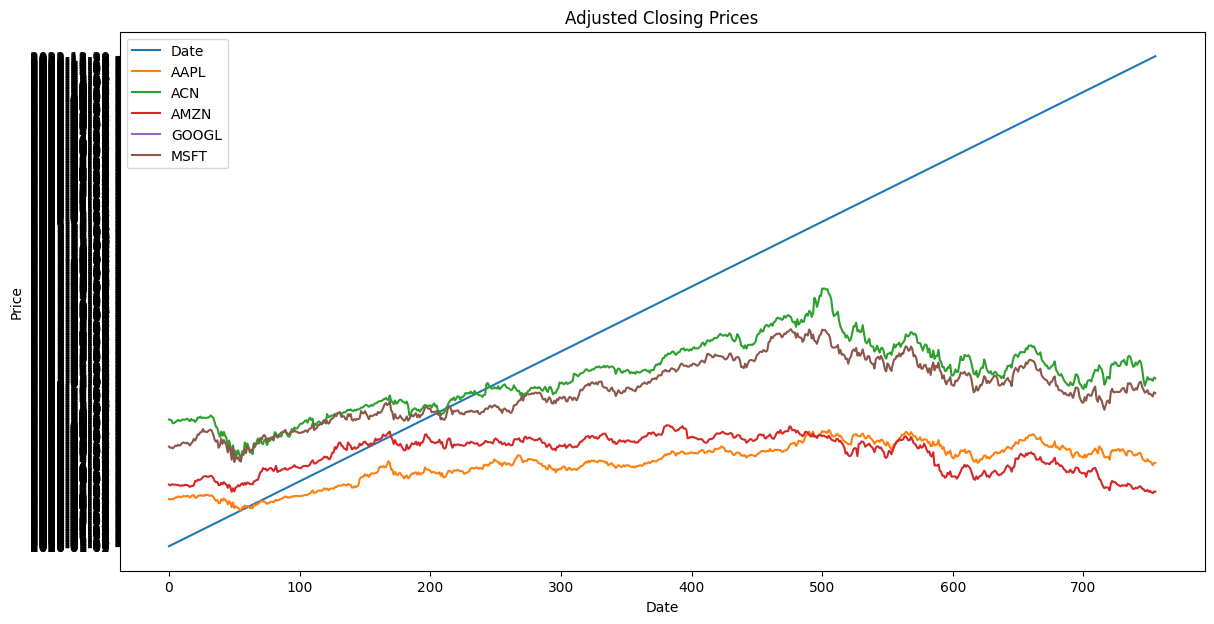

In [7]:
plt.figure(figsize=(14, 7))
for column in market_data.columns:
    plt.plot(market_data.index, market_data[column], label=column)
plt.title('Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

###2) Heatmap of Correlation Matrix

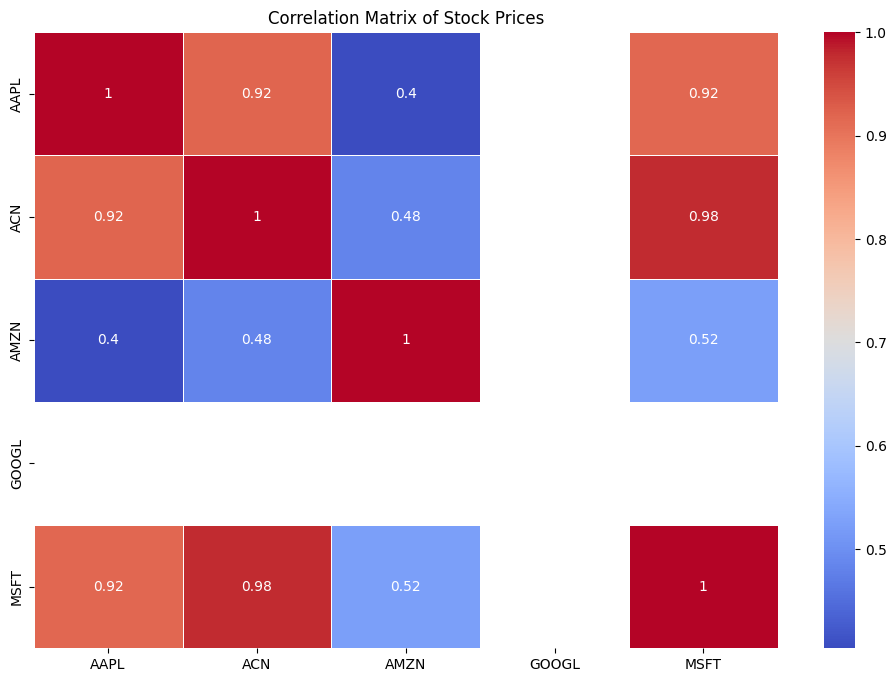

In [8]:
mar_data = market_data.drop('Date', axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(mar_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Prices')
plt.show()

###3) Distribution of Stock Returns

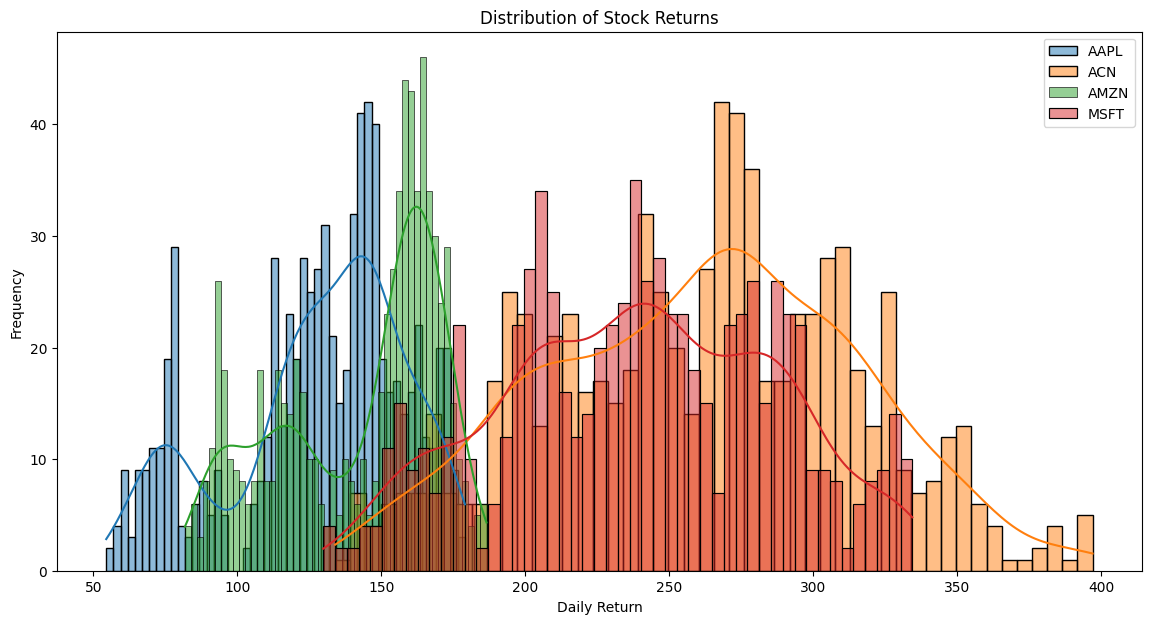

In [9]:
returns = market_data.pivot_table(index='Date')
plt.figure(figsize=(14, 7))
for column in returns.columns:
    sns.histplot(returns[column],kde=True, label=column, bins=50)
plt.title('Distribution of Stock Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

###4) Boxplot of Stock Returns

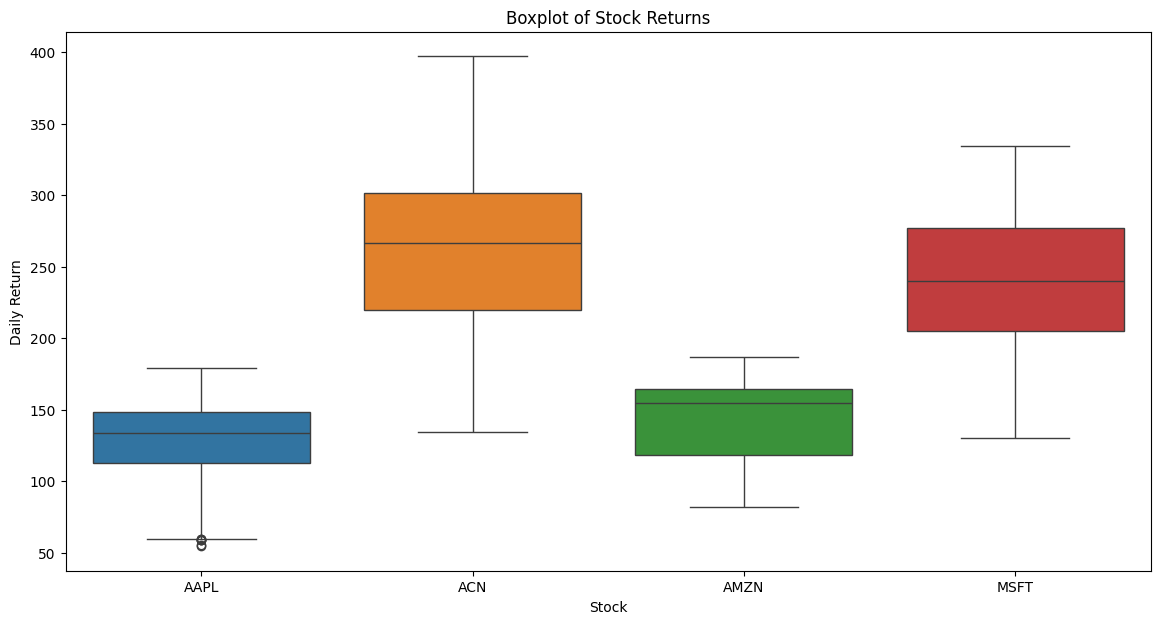

In [10]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=returns)
plt.title('Boxplot of Stock Returns')
plt.xlabel('Stock')
plt.ylabel('Daily Return')
plt.show()

###5) Summary Statistics

In [11]:
print("Summary Statistics of Stock Returns")
print(returns.describe())

Summary Statistics of Stock Returns
             AAPL         ACN        AMZN        MSFT
count  756.000000  756.000000  756.000000  756.000000
mean   127.940988  261.066883  142.455482  238.859864
std     30.494847   54.332687   27.856019   47.356442
min     54.509766  134.027588   81.820000  129.881012
25%    112.981400  219.488544  118.337875  204.823326
50%    133.331635  266.753143  154.467499  239.862106
75%    148.579048  301.400345  164.633247  276.641159
max    179.076599  397.036987  186.570496  334.436401


###6) User Portfolio Distribution

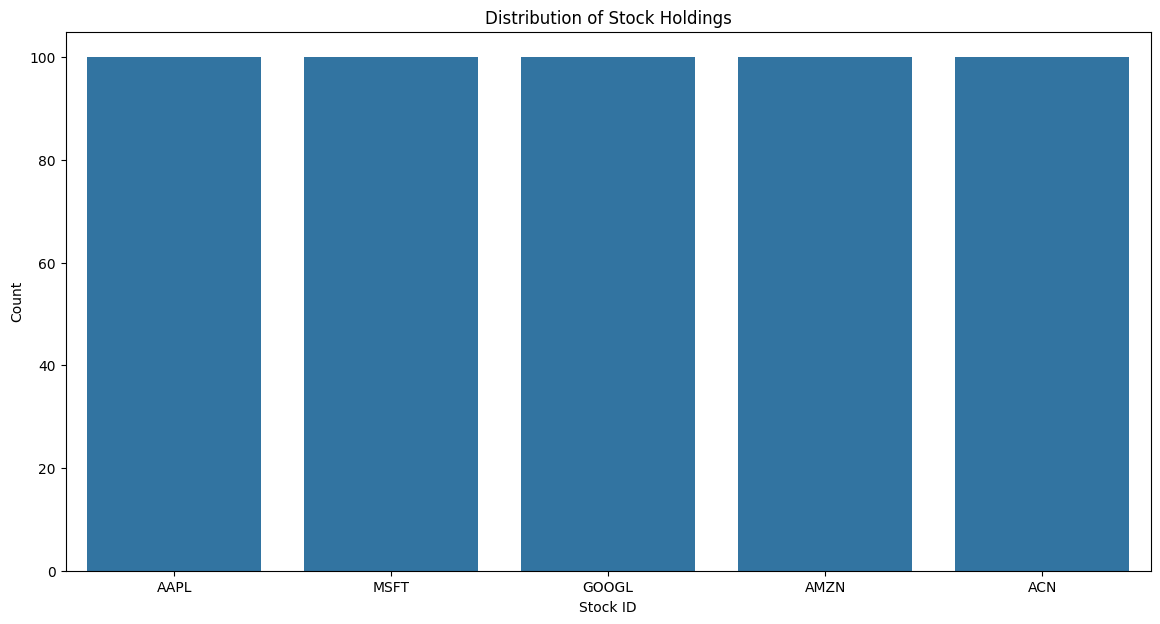

In [12]:
plt.figure(figsize=(14, 7))
sns.countplot(data=portfolio_data, x='stock_id')
plt.title('Distribution of Stock Holdings')
plt.xlabel('Stock ID')
plt.ylabel('Count')
plt.show()

###7) Distribution of Holdings per User

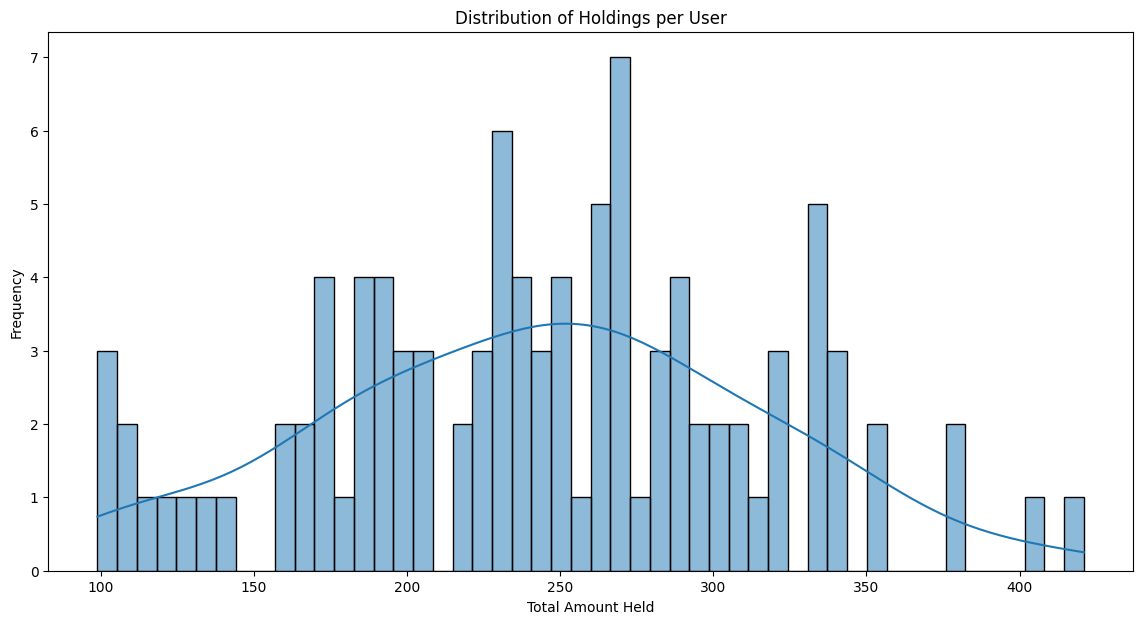

In [13]:
user_holdings = portfolio_data.groupby('user_id')['amount'].sum()
plt.figure(figsize=(14, 7))
sns.histplot(user_holdings, bins=50, kde=True)
plt.title('Distribution of Holdings per User')
plt.xlabel('Total Amount Held')
plt.ylabel('Frequency')
plt.show()

###8) Heatmap of User-Item Interaction Matrix

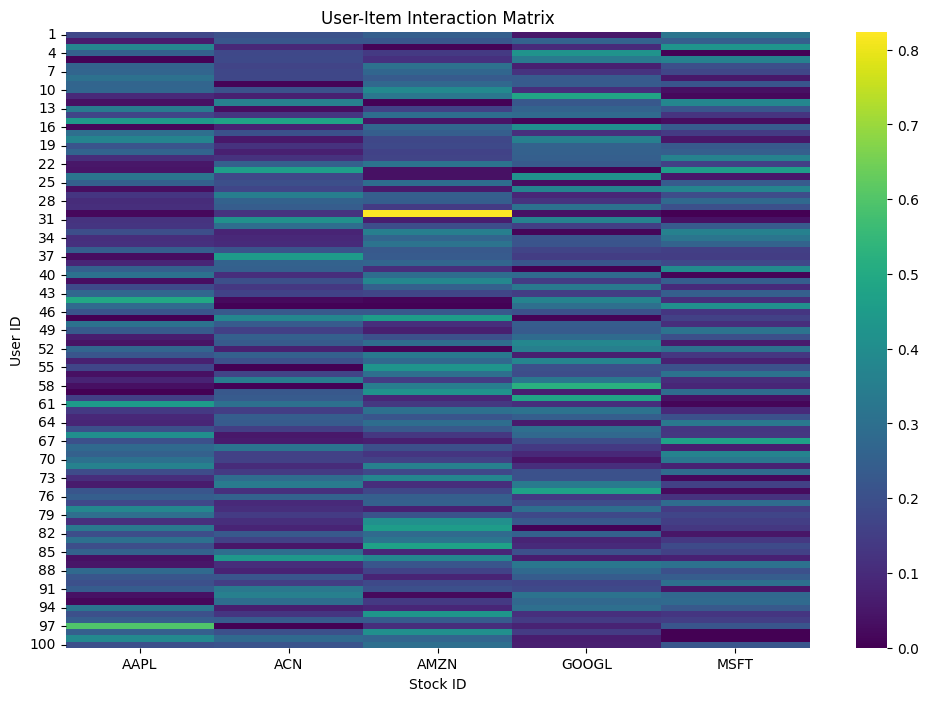

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_matrix, cmap='viridis')
plt.title('User-Item Interaction Matrix')
plt.xlabel('Stock ID')
plt.ylabel('User ID')
plt.show()

##Step-2 MPT

In [15]:
def calculate_mpt_parameters(returns):
    expected_returns = returns.mean()
    cov_matrix = returns.cov()
    return expected_returns, cov_matrix

def portfolio_utility(weights, expected_returns, cov_matrix, risk_aversion):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return portfolio_return - risk_aversion * portfolio_variance

In [16]:
# Example market data processing
returns = market_data.pivot_table(index='Date')
expected_returns, cov_matrix = calculate_mpt_parameters(returns)
mpt_scores = np.random.random(interaction_matrix.shape)
cov_matrix

,AAPL,ACN,AMZN,MSFT
AAPL,929.935714,1522.866478,343.079282,1324.246818
ACN,1522.866478,2952.040911,728.933406,2517.352394
AMZN,343.079282,728.933406,775.957789,690.913586
MSFT,1324.246818,2517.352394,690.913586,2242.632560


In [17]:
# Define the Efficient Frontier
def efficient_frontier(expected_returns, cov_matrix, num_portfolios, risk_aversion_levels):
    num_assets = len(expected_returns)
    results = np.zeros((3, num_portfolios, len(risk_aversion_levels)))
    for i, risk_aversion in enumerate(risk_aversion_levels):
        for j in range(num_portfolios):
            weights = np.random.random(num_assets)
            weights /= np.sum(weights)
            portfolio_return = np.dot(weights, expected_returns)
            portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
            portfolio_utility_value = portfolio_return - risk_aversion * portfolio_variance
            results[0,j,i] = portfolio_return
            results[1,j,i] = portfolio_variance
            results[2,j,i] = portfolio_utility_value
    return results


In [18]:
risk_aversion_levels = np.linspace(0, 10, 100)
num_portfolios = 1000
results = efficient_frontier(expected_returns, cov_matrix, num_portfolios, risk_aversion_levels)
results

array([[[ 1.68953947e+02,  1.98099876e+02,  2.03699153e+02, ...,
          1.88462449e+02,  1.86526290e+02,  1.82794465e+02],
        [ 2.14521802e+02,  2.27246430e+02,  2.18949012e+02, ...,
          2.11372455e+02,  1.90351079e+02,  1.79487389e+02],
        [ 1.83294821e+02,  1.96436923e+02,  2.15773838e+02, ...,
          1.77654060e+02,  2.06928845e+02,  1.93378176e+02],
        ...,
        [ 1.97607306e+02,  1.94898806e+02,  1.67283082e+02, ...,
          2.10271630e+02,  1.85552041e+02,  1.89364129e+02],
        [ 2.00455527e+02,  1.83679527e+02,  1.86706802e+02, ...,
          1.81675412e+02,  2.14025999e+02,  2.43500223e+02],
        [ 2.24911569e+02,  2.08514383e+02,  2.33714633e+02, ...,
          1.65948381e+02,  1.72089519e+02,  2.04472048e+02]],

       [[ 9.64772990e+02,  1.37493191e+03,  1.46366404e+03, ...,
          1.21233643e+03,  1.13347133e+03,  1.12680793e+03],
        [ 1.64854377e+03,  2.06148172e+03,  2.02075480e+03, ...,
          1.49060611e+03,  1.35102994e

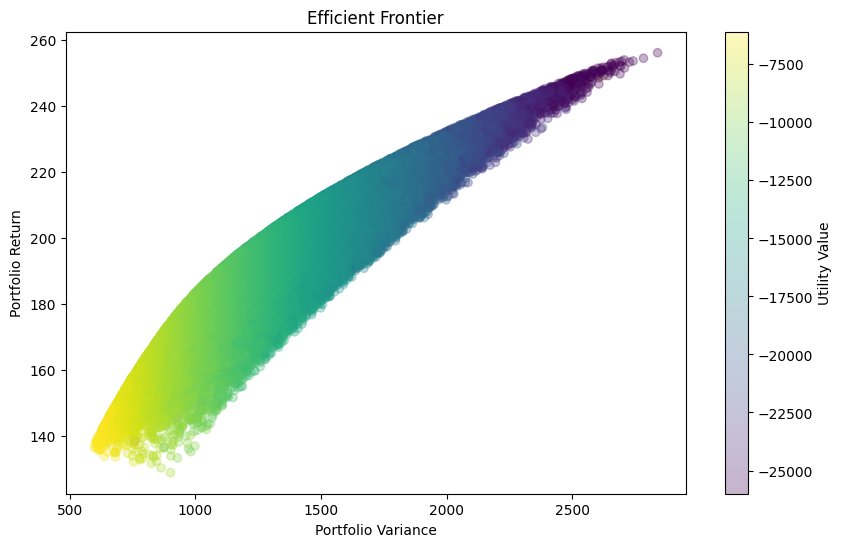

In [19]:
plt.figure(figsize=(10, 6))
for i in range(len(risk_aversion_levels)):
    plt.scatter(results[1,:,i], results[0,:,i], c=results[2,:,i], cmap='viridis', marker='o', alpha=0.3)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Variance')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Utility Value')
plt.show()

In [20]:
# from sklearn.model_selection import train_test_split

# # Split data into training and testing sets
# train_data, test_data = train_test_split(portfolio_data, test_size=0.2, random_state=42)

# # Create interaction matrices for training and testing
# train_interaction_matrix = train_data.pivot_table(index='user_id', columns='stock_id', values='amount', fill_value=0)
# test_interaction_matrix = test_data.pivot_table(index='user_id', columns='stock_id', values='amount', fill_value=0)

# # Normalize the training interaction matrix
# normalized_train_interaction_matrix = normalize(train_interaction_matrix, norm='l1', axis=1)

# # Compute item-item similarity matrix for training data
# train_item_similarity = cosine_similarity(normalized_train_interaction_matrix.T)

##Step 3: Collaborative Filtering (CF)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute item-item similarity matrix
item_similarity = cosine_similarity(interaction_matrix.T)

# Generate CF recommendations
def cf_recommendations(interaction_matrix, item_similarity, top_n=10):
    user_scores = interaction_matrix.dot(item_similarity)
    recommendations = np.argsort(-user_scores, axis=1)[:, :top_n]
    return recommendations

cf_recs = cf_recommendations(interaction_matrix, item_similarity)


In [22]:
cf_recs

array([[4, 1, 2, 0, 3],
       [1, 3, 4, 2, 0],
       [4, 0, 3, 1, 2],
       [3, 0, 1, 2, 4],
       [4, 3, 1, 2, 0],
       [2, 0, 1, 4, 3],
       [2, 0, 1, 4, 3],
       [0, 3, 2, 1, 4],
       [0, 3, 2, 4, 1],
       [2, 1, 0, 3, 4],
       [3, 2, 1, 0, 4],
       [4, 1, 3, 2, 0],
       [0, 3, 4, 2, 1],
       [3, 2, 1, 0, 4],
       [1, 0, 2, 3, 4],
       [3, 2, 4, 1, 0],
       [0, 2, 1, 4, 3],
       [0, 3, 2, 1, 4],
       [3, 4, 0, 2, 1],
       [3, 0, 4, 2, 1],
       [4, 3, 1, 2, 0],
       [2, 1, 3, 4, 0],
       [1, 4, 2, 3, 0],
       [3, 0, 1, 4, 2],
       [2, 1, 4, 0, 3],
       [4, 3, 1, 2, 0],
       [1, 2, 4, 3, 0],
       [1, 4, 2, 3, 0],
       [3, 1, 4, 2, 0],
       [2, 1, 3, 0, 4],
       [1, 3, 2, 0, 4],
       [1, 4, 2, 3, 0],
       [4, 2, 0, 1, 3],
       [4, 2, 3, 1, 0],
       [2, 4, 3, 1, 0],
       [1, 2, 0, 3, 4],
       [1, 2, 4, 3, 0],
       [1, 2, 3, 4, 0],
       [4, 1, 0, 2, 3],
       [0, 3, 2, 1, 4],
       [2, 1, 4, 3, 0],
       [3, 2, 1,

##Step 4: Hybrid Recommendation System

In [23]:
def hybrid_recommendations(mpt_scores, cf_scores, alpha=0.5):
    # Combine MPT and CF scores
    combined_scores = alpha * mpt_scores + (1 - alpha) * cf_scores
    return np.argsort(-combined_scores, axis=1)

# Assuming mpt_scores is derived from the MPT step and has the same shape as cf_scores
# mpt_scores = np.random.random(interaction_matrix.shape)
hybrid_recs = hybrid_recommendations(mpt_scores, cf_recs)


In [24]:
hybrid_recs

array([[0, 4, 2, 1, 3],
       [2, 1, 3, 0, 4],
       [0, 2, 4, 3, 1],
       [4, 0, 3, 2, 1],
       [0, 1, 3, 2, 4],
       [3, 4, 0, 2, 1],
       [3, 4, 0, 2, 1],
       [4, 1, 2, 3, 0],
       [3, 1, 2, 4, 0],
       [4, 3, 0, 1, 2],
       [4, 0, 1, 2, 3],
       [0, 2, 3, 1, 4],
       [2, 1, 3, 4, 0],
       [4, 0, 1, 2, 3],
       [4, 3, 2, 0, 1],
       [2, 0, 1, 3, 4],
       [3, 4, 1, 2, 0],
       [4, 1, 2, 3, 0],
       [1, 0, 3, 4, 2],
       [2, 0, 3, 4, 1],
       [0, 1, 3, 2, 4],
       [3, 2, 0, 1, 4],
       [1, 3, 2, 0, 4],
       [3, 0, 4, 2, 1],
       [2, 4, 0, 1, 3],
       [0, 1, 3, 2, 4],
       [2, 3, 1, 0, 4],
       [1, 3, 2, 0, 4],
       [2, 0, 3, 1, 4],
       [4, 2, 0, 1, 3],
       [4, 1, 2, 0, 3],
       [1, 3, 2, 0, 4],
       [0, 4, 1, 3, 2],
       [0, 2, 1, 3, 4],
       [1, 2, 0, 3, 4],
       [4, 3, 1, 0, 2],
       [2, 3, 1, 0, 4],
       [3, 2, 1, 0, 4],
       [0, 4, 3, 1, 2],
       [4, 1, 2, 3, 0],
       [2, 3, 0, 1, 4],
       [4, 0, 1,

##Step 5: Optimization and Evaluation

In [27]:
# Optimization for scalability (e.g., using parallel processing)
# Evaluation of the model (e.g., backtesting, expert validation)

# Placeholder function for evaluation
def evaluate_recommendations(recommendations, true_holdings):
    precision = np.mean([int(item in true_holdings[i]) for i, rec in enumerate(recommendations) for item in rec])
    return precision

# Placeholder for true_holdings
true_holdings = np.random.randint(0, 2, interaction_matrix.shape)

precision = evaluate_recommendations(hybrid_recs, true_holdings)
print(f"Precision of recommendations: {precision}")


Precision of recommendations: 0.4


In [31]:
import numpy as np

# Placeholder function for accuracy evaluation
def evaluate_accuracy(recommendations, true_holdings):
    total_predictions = 0
    correct_predictions = 0

    for i, rec in enumerate(recommendations):
        for item in range(len(true_holdings[i])):
            if (item in rec and true_holdings[i][item] == 1) or (item not in rec and true_holdings[i][item] == 0):
                correct_predictions += 1
            total_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy

# Example placeholder for true_holdings and recommendations
interaction_matrix = np.random.randint(0, 2, (10, 5))  # Example interaction matrix
true_holdings = np.random.randint(0, 2, interaction_matrix.shape)  # Simulated true holdings
hybrid_recs = [np.random.choice(range(interaction_matrix.shape[1]), 3, replace=False) for _ in range(interaction_matrix.shape[0])]  # Simulated recommendations

# Evaluate accuracy
accuracy = evaluate_accuracy(hybrid_recs, true_holdings)
print(f"Accuracy of recommendations: {accuracy}")


Accuracy of recommendations: 0.66
